In [381]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.decomposition import PCA 
from sklearn.preprocessing import scale

In [382]:
#upload sheet 
wine=pd.read_csv("wine.csv")
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [383]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [384]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [385]:
#in type column not given useful data so ignor and iloc function use
wine1=wine.iloc[:,1:]
wine1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [386]:
#find numerical value
WINE=wine.values

In [387]:
WINE

array([[1.000e+00, 1.423e+01, 1.710e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [388]:
#normilization the data and use scale function
wine_norm=scale(WINE)
wine_norm

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [389]:
#use PCA function and fit the data

pca=PCA(n_components=13)
pca_values=pca.fit_transform(wine_norm)
pca_values

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
        -4.20493905e-01,  5.52927766e-01, -3.02978176e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
        -1.30019629e-01,  3.94971160e-01, -1.46645308e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
        -2.79074108e-01,  1.89799314e-03,  2.12780166e-02],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
         5.02640272e-01,  6.93336340e-01,  1.67035660e-01],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         3.13785741e-01,  3.44119826e-01, -1.09514873e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
        -2.38282390e-01, -1.89866131e-01, -1.64090011e-01]])

In [390]:
# loading & Weight 
pca.components_

array([[ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
        -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
         0.08931829, -0.27682265, -0.35052618, -0.26951525],
       [-0.00569041, -0.48416087, -0.22359095, -0.31585588,  0.01161574,
        -0.30055143, -0.06711983,  0.00131345, -0.0269887 , -0.04122256,
        -0.52978274,  0.27790735,  0.16277625, -0.36605886],
       [ 0.00121795, -0.20740081,  0.08879606,  0.62610236,  0.6119896 ,
         0.13098458,  0.14650775,  0.15096275,  0.16997551,  0.14987959,
        -0.1372663 ,  0.08532854,  0.16620436, -0.12668685],
       [ 0.12246373, -0.08191848,  0.46988824, -0.24984122,  0.07199322,
        -0.16321412,  0.19098521,  0.14461667, -0.32801272,  0.46275771,
         0.07211248, -0.43466618,  0.15672341, -0.2557949 ],
       [ 0.15758395, -0.25089415, -0.18860015, -0.0935236 ,  0.0465675 ,
         0.77833048, -0.14466563, -0.11200553, -0.43257916,  0.0915882 ,
        -0.0462696 , -0.02

In [391]:
## The amount of variance that each PCA explains is 
var=pca.explained_variance_ratio_
var


array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458])

In [392]:
## Cumulative variance
var1=np.cumsum(np.round(var,decimals=4)*100)
var1

array([39.54, 57.38, 67.71, 74.34, 80.61, 85.42, 89.38, 91.88, 93.98,
       95.85, 97.46, 98.67, 99.6 ])

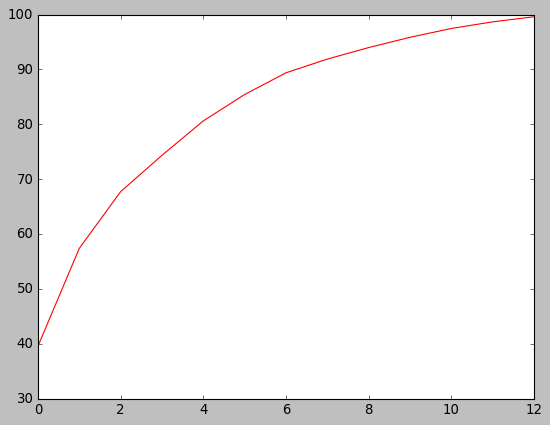

In [393]:
plt.plot(var1,color='red')

In [394]:
pca_values[:,0:1]

array([[-3.5229339 ],
       [-2.52885806],
       [-2.78502898],
       [-3.92258841],
       [-1.40751111],
       [-3.28812981],
       [-2.75057754],
       [-2.39286652],
       [-2.79525633],
       [-3.00559666],
       [-3.67868855],
       [-2.10963477],
       [-2.43845636],
       [-3.67349453],
       [-4.44157575],
       [-2.60892387],
       [-2.47542846],
       [-2.22623243],
       [-3.74226929],
       [-2.3944115 ],
       [-3.33656895],
       [-1.48140399],
       [-2.82806867],
       [-2.00771405],
       [-2.11463604],
       [-1.39753751],
       [-2.13348803],
       [-1.62970383],
       [-2.50760753],
       [-2.55948318],
       [-2.77244452],
       [-2.93513374],
       [-1.99124842],
       [-2.24570987],
       [-1.78698628],
       [-2.22763867],
       [-1.76802847],
       [-1.52317798],
       [-1.87236494],
       [-2.79711434],
       [-2.84093569],
       [-1.1055721 ],
       [-3.30689482],
       [-0.90479842],
       [-2.39683569],
       [-1

In [395]:
finalDF=pd.concat([pd.DataFrame(pca_values[:,0:5],columns=['pc1','pc2','pc3','pc4','pc5']),wine[['Type']]],axis=1)
finalDF

,pc1,pc2,pc3,pc4,pc5,Type
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,1
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,1
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,1
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,1
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,1
...,...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109,3
174,2.942729,-1.752263,0.207480,0.399381,0.154223,3
175,3.027272,-2.756040,-0.940803,0.607758,1.128136,3
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083,3


In [396]:
import matplotlib.pyplot as plt
plt.style.use('classic')

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

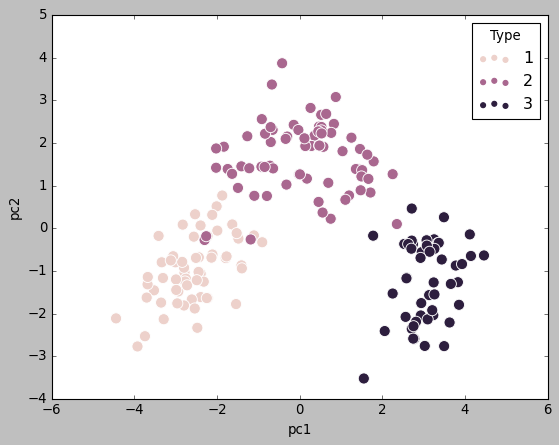

In [397]:
import seaborn as sns

sns.scatterplot(data=finalDF,x='pc1',y='pc2',hue='Type',s=100)

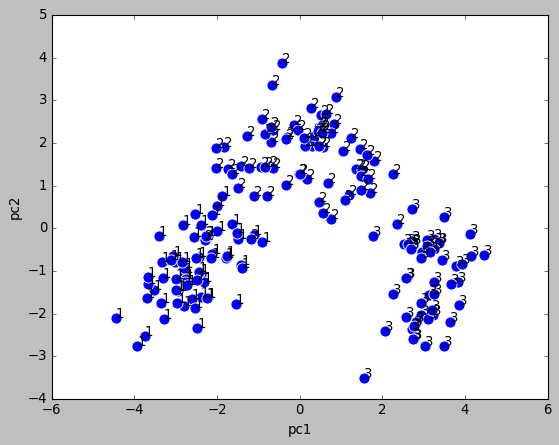

In [398]:
p1=sns.scatterplot(data=finalDF,x='pc1',y='pc2',s=100)

import matplotlib.pyplot as plt
for line in range(0,finalDF.shape[0]):
    p1.text(finalDF.pc1[line],finalDF.pc2[line],finalDF.Type[line],horizontalalignment='left',size='medium')



# heirarchial Cluter perform  Using first 3 principle component

In [399]:
df=finalDF.iloc[:,0:3]
df

,pc1,pc2,pc3
0,-3.522934,-1.453098,-0.164795
1,-2.528858,0.330019,-2.026707
2,-2.785029,-1.036936,0.983238
3,-3.922588,-2.768210,-0.174968
4,-1.407511,-0.867773,2.025829
...,...,...,...
173,3.627996,-2.206617,-0.343668
174,2.942729,-1.752263,0.207480
175,3.027272,-2.756040,-0.940803
176,2.755222,-2.293784,-0.550474


In [400]:
df.shape

(178, 3)

In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc1     178 non-null    float64
 1   pc2     178 non-null    float64
 2   pc3     178 non-null    float64
dtypes: float64(3)
memory usage: 4.3 KB


In [402]:
from sklearn.preprocessing import MinMaxScaler
trans=MinMaxScaler()
data=pd.DataFrame(trans.fit_transform(df.iloc[:,0:]))
data

,0,1,2
0,0.103200,0.279639,0.445096
1,0.214875,0.520989,0.257637
2,0.186097,0.335968,0.560682
3,0.058303,0.101634,0.444072
4,0.340848,0.358864,0.665651
...,...,...,...
173,0.906538,0.177648,0.427087
174,0.829555,0.239146,0.482577
175,0.839053,0.103282,0.366967
176,0.808490,0.165849,0.406266


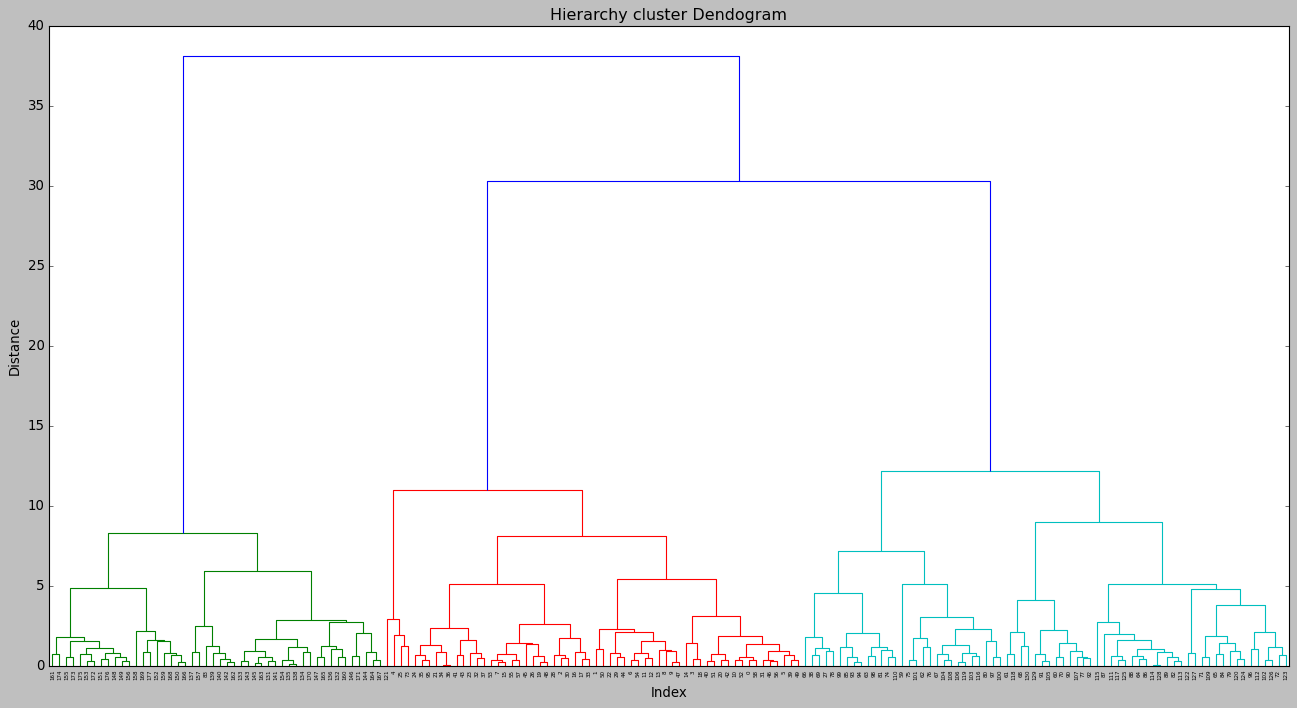

In [403]:
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
z=linkage(df,method="ward",metric="euclidean")
plt.figure(figsize=(20,10))
plt.title("Hierarchy cluster Dendogram")
plt.xlabel("Index")
plt.ylabel("Distance")
sch.dendrogram(z)
plt.show()


In [404]:
from sklearn.cluster import AgglomerativeClustering 
h_complete=AgglomerativeClustering(n_clusters=6,linkage="ward",affinity="euclidean").fit(df)
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
df['clust']=cluster_labels
df

,pc1,pc2,pc3,clust
0,-3.522934,-1.453098,-0.164795,2
1,-2.528858,0.330019,-2.026707,2
2,-2.785029,-1.036936,0.983238,2
3,-3.922588,-2.768210,-0.174968,2
4,-1.407511,-0.867773,2.025829,4
...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0
174,2.942729,-1.752263,0.207480,0
175,3.027272,-2.756040,-0.940803,0
176,2.755222,-2.293784,-0.550474,0


In [405]:
df

,pc1,pc2,pc3,clust
0,-3.522934,-1.453098,-0.164795,2
1,-2.528858,0.330019,-2.026707,2
2,-2.785029,-1.036936,0.983238,2
3,-3.922588,-2.768210,-0.174968,2
4,-1.407511,-0.867773,2.025829,4
...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0
174,2.942729,-1.752263,0.207480,0
175,3.027272,-2.756040,-0.940803,0
176,2.755222,-2.293784,-0.550474,0


In [406]:
df.iloc[:,0:].groupby(df.clust).mean()

,pc1,pc2,pc3,clust
clust,,,,
0,3.085326,-1.229845,-0.156680,0.0
1,-0.638700,1.976560,-0.872449,1.0
2,-2.647113,-1.010518,-0.208096,2.0
3,0.174539,1.607374,1.228084,3.0
4,-1.572218,-0.585326,3.642297,4.0
5,1.543595,1.202781,-0.344653,5.0


In [407]:
df2=df[df.clust==2]
df2.head()

,pc1,pc2,pc3,clust
0,-3.522934,-1.453098,-0.164795,2
1,-2.528858,0.330019,-2.026707,2
2,-2.785029,-1.036936,0.983238,2
3,-3.922588,-2.768210,-0.174968,2
5,-3.288130,-2.130175,-0.628992,2


In [408]:
df2.shape

(56, 4)

In [409]:
df3=df[df.clust==3]
df3.head()

,pc1,pc2,pc3,clust
64,0.574536,1.911151,0.678679,3
65,-0.791471,0.758726,0.574196,3
71,-1.491978,0.947927,1.953837,3
72,0.693967,1.066863,0.079864,3
79,-0.319220,1.024770,1.794821,3


In [410]:
df5=df[df.clust==5]
df5.head()

,pc1,pc2,pc3,clust
60,1.414661,1.389954,-0.876471,5
61,1.713879,0.838856,-1.607072,5
68,0.751508,0.225209,-0.708154,5
70,1.476300,0.892249,-0.629943,5
77,1.361178,1.390346,-0.228303,5


In [411]:
df0=df[df.clust==0]
df0.head()

,pc1,pc2,pc3,clust
83,2.352417,0.100140,0.472254,0
131,2.741919,-0.370857,-0.723641,0
132,3.254297,-0.257563,-0.167783,0
133,2.530366,-0.365989,-0.452794,0
134,2.713024,0.463874,-1.101623,0


In [412]:
df0.shape

(48, 4)

In [413]:
df5.shape

(13, 4)

In [414]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
df_subset=pd.DataFrame(scaler.fit_transform(df.iloc[:,0:3]))
df_subset

,0,1,2
0,-1.497299,-0.919558,-0.137041
1,-1.074802,0.208845,-1.685371
2,-1.183678,-0.656200,0.817642
3,-1.667158,-1.751795,-0.145500
4,-0.598213,-0.549149,1.684642
...,...,...,...
173,1.541952,-1.396404,-0.285788
174,1.250703,-1.108877,0.172536
175,1.286635,-1.744093,-0.782354
176,1.171010,-1.451565,-0.457764


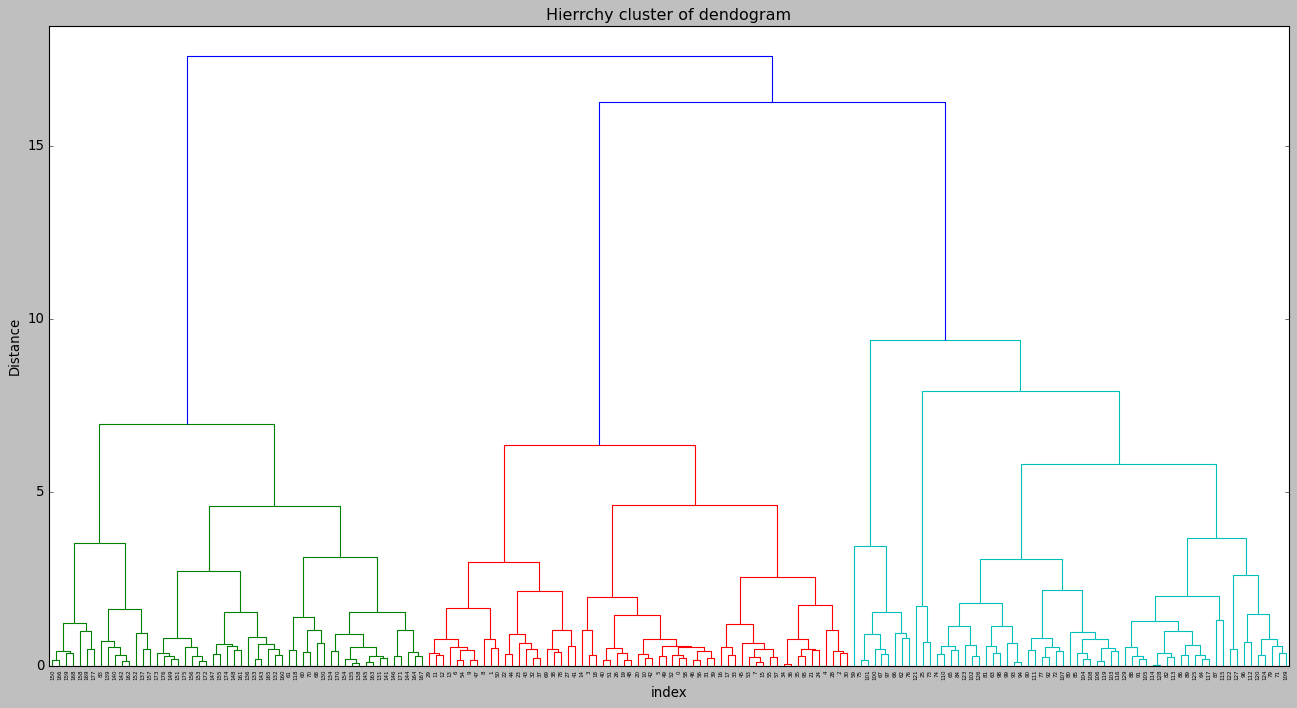

In [415]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt 
import seaborn as sns
z=linkage(df_subset,method="ward",metric="euclidean")
plt.figure(figsize=(20,10))
plt.title("Hierrchy cluster of dendogram")
plt.xlabel("index")
plt.ylabel("Distance")
sch.dendrogram(z)
plt.show()


In [416]:
from sklearn.cluster import AgglomerativeClustering 
h_complete=AgglomerativeClustering(n_clusters=6,linkage="ward",affinity="euclidean").fit(df_subset)
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
df['clust']=cluster_labels
df

,pc1,pc2,pc3,clust
0,-3.522934,-1.453098,-0.164795,0
1,-2.528858,0.330019,-2.026707,0
2,-2.785029,-1.036936,0.983238,0
3,-3.922588,-2.768210,-0.174968,0
4,-1.407511,-0.867773,2.025829,0
...,...,...,...,...
173,3.627996,-2.206617,-0.343668,2
174,2.942729,-1.752263,0.207480,2
175,3.027272,-2.756040,-0.940803,2
176,2.755222,-2.293784,-0.550474,2


In [417]:
df.iloc[:,0:].groupby(df.clust).mean()

,pc1,pc2,pc3,clust
clust,,,,
0,-2.557119,-0.892503,-0.243609,0.0
1,0.102782,1.765513,0.674050,1.0
2,2.948188,-0.803191,-0.742232,2.0
3,-0.206408,2.273810,-1.959300,3.0
4,-1.627121,-0.491177,4.181120,4.0
5,2.833471,-1.550989,0.968065,5.0


In [418]:
df0=df[df.clust==0]
df0.head()

,pc1,pc2,pc3,clust
0,-3.522934,-1.453098,-0.164795,0
1,-2.528858,0.330019,-2.026707,0
2,-2.785029,-1.036936,0.983238,0
3,-3.922588,-2.768210,-0.174968,0
4,-1.407511,-0.867773,2.025829,0


# in above explanation in Hierarchy cluster,normalization and standard cluster follow the same data

# KMean Cluter perform Using first 3 principal component

In [419]:
df_Kmean=finalDF.iloc[:,0:3]
df_Kmean

,pc1,pc2,pc3
0,-3.522934,-1.453098,-0.164795
1,-2.528858,0.330019,-2.026707
2,-2.785029,-1.036936,0.983238
3,-3.922588,-2.768210,-0.174968
4,-1.407511,-0.867773,2.025829
...,...,...,...
173,3.627996,-2.206617,-0.343668
174,2.942729,-1.752263,0.207480
175,3.027272,-2.756040,-0.940803
176,2.755222,-2.293784,-0.550474


In [420]:
import warnings
warnings.filterwarnings("ignore")

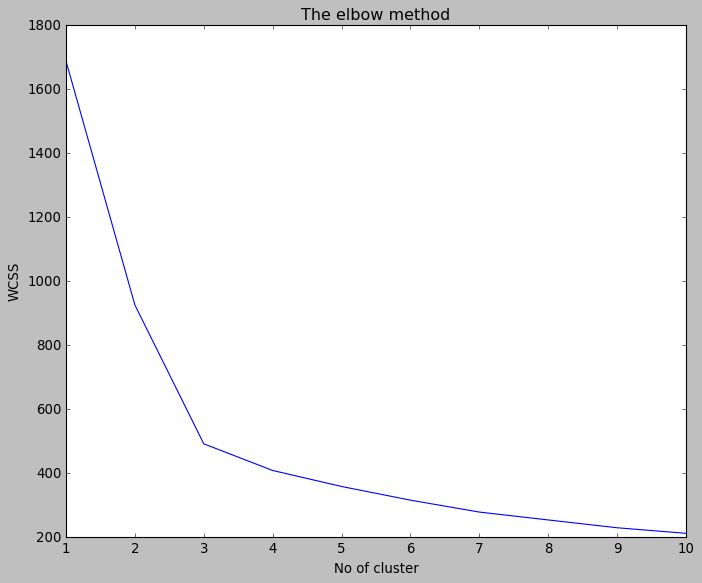

In [421]:
from sklearn.cluster import KMeans
fig=plt.figure(figsize=(10,8))
WCSS=[]
for i in range(1,11):
    clf=KMeans(n_clusters=i)
    clf.fit(df_Kmean)
    WCSS.append(clf.inertia_)
plt.plot(range(1,11),WCSS)
plt.title("The elbow method")
plt.xlabel("No of cluster")
plt.ylabel("WCSS")
plt.show()

In [422]:
clf=KMeans(n_clusters=4)
y_KMeans=clf.fit_predict(df_Kmean)

In [423]:
y_KMeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 3, 3,
       0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 3, 1, 3, 0, 3, 3,
       3, 3, 0, 3, 0, 0, 0, 2, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 0, 3,
       0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [424]:
clf.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 3, 3,
       0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 3, 1, 3, 0, 3, 3,
       3, 3, 0, 3, 0, 0, 0, 2, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 0, 3,
       0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [425]:
clf.cluster_centers_

array([[-0.02772597,  1.84697629, -0.86276137],
       [ 3.05866503, -1.20826261, -0.17754116],
       [-2.60819871, -0.98906249, -0.18992032],
       [ 0.06854496,  1.43083845,  1.45069442]])

In [426]:
clf.inertia_

407.2869627431866

In [427]:
md=pd.Series(y_KMeans)
df_Kmean['clust']=md
df_Kmean

,pc1,pc2,pc3,clust
0,-3.522934,-1.453098,-0.164795,2
1,-2.528858,0.330019,-2.026707,2
2,-2.785029,-1.036936,0.983238,2
3,-3.922588,-2.768210,-0.174968,2
4,-1.407511,-0.867773,2.025829,2
...,...,...,...,...
173,3.627996,-2.206617,-0.343668,1
174,2.942729,-1.752263,0.207480,1
175,3.027272,-2.756040,-0.940803,1
176,2.755222,-2.293784,-0.550474,1


In [428]:
df_Kmean.iloc[:,0:].groupby(df_Kmean.clust).mean()

,pc1,pc2,pc3,clust
clust,,,,
0,-0.027726,1.846976,-0.862761,0.0
1,3.058665,-1.208263,-0.177541,1.0
2,-2.608199,-0.989062,-0.189920,2.0
3,0.068545,1.430838,1.450694,3.0


In [429]:
df_kmean0=df_Kmean[df_Kmean.clust==0]
df_kmean0.head()


,pc1,pc2,pc3,clust
38,-1.872365,0.769306,-1.426819,0
59,0.874925,3.077724,-4.585646,0
60,1.414661,1.389954,-0.876471,0
61,1.713879,0.838856,-1.607072,0
62,-0.012297,1.262696,-1.784605,0


In [430]:
df_kmean1=df_Kmean[df_Kmean.clust==1]
df_kmean1.head()

,pc1,pc2,pc3,clust
83,2.352417,0.100140,0.472254,1
130,1.778946,-0.172315,-1.178869,1
131,2.741919,-0.370857,-0.723641,1
132,3.254297,-0.257563,-0.167783,1
133,2.530366,-0.365989,-0.452794,1


In [431]:
df_kmean2=df_Kmean[df_Kmean.clust==2]
df_kmean2.head()

,pc1,pc2,pc3,clust
0,-3.522934,-1.453098,-0.164795,2
1,-2.528858,0.330019,-2.026707,2
2,-2.785029,-1.036936,0.983238,2
3,-3.922588,-2.768210,-0.174968,2
4,-1.407511,-0.867773,2.025829,2


In [432]:
df_kmean3=df_Kmean[df_Kmean.clust==3]
df_kmean3.head()

,pc1,pc2,pc3,clust
25,-1.397538,-0.938215,3.819842,3
64,0.574536,1.911151,0.678679,3
65,-0.791471,0.758726,0.574196,3
71,-1.491978,0.947927,1.953837,3
73,-2.299457,-0.274359,3.376817,3


In [433]:
plt.style.use(['classic'])
print(plt.style.available)



['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Text(0.5, 1.0, 'cluster using KMeans')

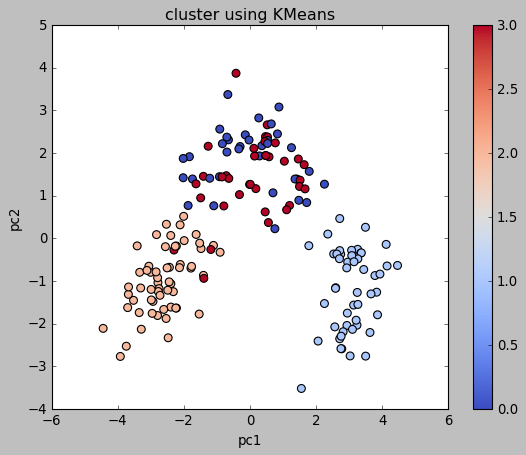

In [434]:
df_Kmean.plot(x="pc1",y="pc2",c=clf.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm)
plt.title("cluster using KMeans")